In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



# <font size="+3"><span style='color:#5c2835'> **P6 - Classifiez automatiquement des biens de consommation** </span></font>


---
---

<font size="+2" color="black"><b>**LOADING LIBRAIRIES**</b></font><br><a name="LOADING_LIBRARIES"></a>

---

In [2]:

# ----------------------
# Packages Installation
# ----------------------
!pip install py_edamam

# Builtin
from py_edamam import PyEdamam
import requests
import pandas as pd
import json

import matplotlib.pyplot as plt
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for py_edamam: filename=py_edamam-0.2-py3-none-any.whl size=3639 sha256=300d1831d9eba6eba1559c2d6a306a35fd10f2f0e7c66eef8042f29c702928db
  Stored in directory: /root/.cache/pip/wheels/8b/9c/92/a96fd6580b86a99af92887dd3edef420df851da1d7d6b3f228
Successfully built py_edamam


---
---

<font size="+1" color="black"><b>PARAMETERS USED IN THIS NOTEBOOK</b></font><br><a name="USED_PARAMETERS"></a>

---

In [3]:
# Création d'une liste avec les données à trouver
target_cols = ['foodId', 'label', 'category', 'categoryLabel',
               'image', 'foodContentsLabel']

# Définir le dossier dans lequel le fichier ".csv" sera enregistré
P6_cleaned = "/content/drive/MyDrive/Projet6_NLP/P6_travail/p6_cleaned/"


<font size="+3"><span style='color:#5c2835'> **P6 - Classifiez automatiquement des biens de consommation** </span></font>


Ce notebook fait partie u projet d'automamatisation de l'attibution de la catégorie d'un article sur le site ***place de marché***.

![logo](https://user.oc-static.com/upload/2019/02/24/15510259240381_Projet%20textimage%20logo.png)

Les demarches réalisés dans les notebooks précédents démontrent la faisabilité de la catégorisation en fonction du texte et des images qui caractérisent les produits.<br>
L'objectif de ce notebook est de démontrer s'il est possible de collecter des informations pour augmenter le volume de données disponibles pour la catégorie épicerie fine. Pour ceci on travaillera avec l'API ***Edamam*** et on prendra comme exemple les produits à base de **"champagne"**.<br>

# <font size="+3" color="#5c2835"><b>Requête sur *Edamam*</b></font><br><a name="requete"></a>

In [4]:
# Requete "champagne" sur Edamam

url = "https://edamam-food-and-grocery-database.p.rapidapi.com/api/food-database/v2/parser"


# Application d'un filtre sur 'ingredient' = Champagne
# Cela permet de ne récupérer que les données nécessaires pour le projet
querystring = {"ingr":"Champagne","nutrition-type":"cooking",
               "category[0]":"generic-foods","health[0]":"alcohol-free"}

headers = {
	"X-RapidAPI-Key": "704dbaf6dfmshd5cb3516523976fp1dfcfejsn52770b5e2a98",
	"X-RapidAPI-Host": "edamam-food-and-grocery-database.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)
data_champagne_json = response.json()
print(response.json())

{'text': 'Champagne', 'parsed': [{'food': {'foodId': 'food_a656mk2a5dmqb2adiamu6beihduu', 'uri': 'http://www.edamam.com/ontologies/edamam.owl#Food_table_white_wine', 'label': 'Champagne', 'knownAs': 'dry white wine', 'nutrients': {'ENERC_KCAL': 82.0, 'PROCNT': 0.07, 'FAT': 0.0, 'CHOCDF': 2.6, 'FIBTG': 0.0}, 'category': 'Generic foods', 'categoryLabel': 'food', 'image': 'https://www.edamam.com/food-img/a71/a718cf3c52add522128929f1f324d2ab.jpg'}}], 'hints': [{'food': {'foodId': 'food_a656mk2a5dmqb2adiamu6beihduu', 'uri': 'http://www.edamam.com/ontologies/edamam.owl#Food_table_white_wine', 'label': 'Champagne', 'knownAs': 'dry white wine', 'nutrients': {'ENERC_KCAL': 82.0, 'PROCNT': 0.07, 'FAT': 0.0, 'CHOCDF': 2.6, 'FIBTG': 0.0}, 'category': 'Generic foods', 'categoryLabel': 'food', 'image': 'https://www.edamam.com/food-img/a71/a718cf3c52add522128929f1f324d2ab.jpg'}, 'measures': [{'uri': 'http://www.edamam.com/ontologies/edamam.owl#Measure_unit', 'label': 'Whole', 'weight': 750.0}, {'uri'

In [5]:
data_champagne_json

{'text': 'Champagne',
 'parsed': [{'food': {'foodId': 'food_a656mk2a5dmqb2adiamu6beihduu',
    'uri': 'http://www.edamam.com/ontologies/edamam.owl#Food_table_white_wine',
    'label': 'Champagne',
    'knownAs': 'dry white wine',
    'nutrients': {'ENERC_KCAL': 82.0,
     'PROCNT': 0.07,
     'FAT': 0.0,
     'CHOCDF': 2.6,
     'FIBTG': 0.0},
    'category': 'Generic foods',
    'categoryLabel': 'food',
    'image': 'https://www.edamam.com/food-img/a71/a718cf3c52add522128929f1f324d2ab.jpg'}}],
 'hints': [{'food': {'foodId': 'food_a656mk2a5dmqb2adiamu6beihduu',
    'uri': 'http://www.edamam.com/ontologies/edamam.owl#Food_table_white_wine',
    'label': 'Champagne',
    'knownAs': 'dry white wine',
    'nutrients': {'ENERC_KCAL': 82.0,
     'PROCNT': 0.07,
     'FAT': 0.0,
     'CHOCDF': 2.6,
     'FIBTG': 0.0},
    'category': 'Generic foods',
    'categoryLabel': 'food',
    'image': 'https://www.edamam.com/food-img/a71/a718cf3c52add522128929f1f324d2ab.jpg'},
   'measures': [{'uri': '

## <font size="+2" color="#903b3f"><b>Récupération des champs nécessaires</b></font><br><a id="champs_necessaires"></a>

In [6]:
# Transformer l'objet json à df

df_champagne = pd.json_normalize(data_champagne_json["hints"])

In [7]:
# Création d'un nouveau df avec les colonnes target
df_target_cols = df_champagne.filter(regex='|'.join(target_cols))
df_target_cols.head()

,food.foodId,food.label,food.category,food.categoryLabel,food.image,food.foodContentsLabel
0,food_a656mk2a5dmqb2adiamu6beihduu,Champagne,Generic foods,food,https://www.edamam.com/food-img/a71/a718cf3c52...,NaN
1,food_b753ithamdb8psbt0w2k9aquo06c,"Champagne Vinaigrette, Champagne",Packaged foods,food,NaN,OLIVE OIL; BALSAMIC VINEGAR; CHAMPAGNE VINEGAR...
2,food_b3dyababjo54xobm6r8jzbghjgqe,"Champagne Vinaigrette, Champagne",Packaged foods,food,https://www.edamam.com/food-img/d88/d88b64d973...,INGREDIENTS: WATER; CANOLA OIL; CHAMPAGNE VINE...
3,food_a9e0ghsamvoc45bwa2ybsa3gken9,"Champagne Vinaigrette, Champagne",Packaged foods,food,NaN,CANOLA AND SOYBEAN OIL; WHITE WINE (CONTAINS S...
4,food_an4jjueaucpus2a3u1ni8auhe7q9,"Champagne Vinaigrette, Champagne",Packaged foods,food,NaN,WATER; CANOLA AND SOYBEAN OIL; WHITE WINE (CON...


In [8]:
# Modification du nom des colonnes

df_target_cols = df_target_cols.rename(columns=lambda x: x.split('.')[-1])
df_target_cols.head()

,foodId,label,category,categoryLabel,image,foodContentsLabel
0,food_a656mk2a5dmqb2adiamu6beihduu,Champagne,Generic foods,food,https://www.edamam.com/food-img/a71/a718cf3c52...,NaN
1,food_b753ithamdb8psbt0w2k9aquo06c,"Champagne Vinaigrette, Champagne",Packaged foods,food,NaN,OLIVE OIL; BALSAMIC VINEGAR; CHAMPAGNE VINEGAR...
2,food_b3dyababjo54xobm6r8jzbghjgqe,"Champagne Vinaigrette, Champagne",Packaged foods,food,https://www.edamam.com/food-img/d88/d88b64d973...,INGREDIENTS: WATER; CANOLA OIL; CHAMPAGNE VINE...
3,food_a9e0ghsamvoc45bwa2ybsa3gken9,"Champagne Vinaigrette, Champagne",Packaged foods,food,NaN,CANOLA AND SOYBEAN OIL; WHITE WINE (CONTAINS S...
4,food_an4jjueaucpus2a3u1ni8auhe7q9,"Champagne Vinaigrette, Champagne",Packaged foods,food,NaN,WATER; CANOLA AND SOYBEAN OIL; WHITE WINE (CON...


### <font size="+2" color="#c0553d"><b>Stockage des données, fichier .csv</b></font><br><a id="stockage"></a>

In [9]:
# Enregistrer au format ".csv" les dix premiers produits
df_target_cols.head(10).to_csv(P6_cleaned + 'champagne_dix_produits.csv',
                               sep='\t', encoding='utf-8', index=False)

In [10]:
df_target_cols.shape

(20, 6)

In [11]:
# Vérification 
test = pd.read_csv(P6_cleaned+'champagne_dix_produits.csv', sep='\t')
print(test.shape)
test

(10, 6)


,foodId,label,category,categoryLabel,image,foodContentsLabel
0,food_a656mk2a5dmqb2adiamu6beihduu,Champagne,Generic foods,food,https://www.edamam.com/food-img/a71/a718cf3c52...,NaN
1,food_b753ithamdb8psbt0w2k9aquo06c,"Champagne Vinaigrette, Champagne",Packaged foods,food,NaN,OLIVE OIL; BALSAMIC VINEGAR; CHAMPAGNE VINEGAR...
2,food_b3dyababjo54xobm6r8jzbghjgqe,"Champagne Vinaigrette, Champagne",Packaged foods,food,https://www.edamam.com/food-img/d88/d88b64d973...,INGREDIENTS: WATER; CANOLA OIL; CHAMPAGNE VINE...
3,food_a9e0ghsamvoc45bwa2ybsa3gken9,"Champagne Vinaigrette, Champagne",Packaged foods,food,NaN,CANOLA AND SOYBEAN OIL; WHITE WINE (CONTAINS S...
4,food_an4jjueaucpus2a3u1ni8auhe7q9,"Champagne Vinaigrette, Champagne",Packaged foods,food,NaN,WATER; CANOLA AND SOYBEAN OIL; WHITE WINE (CON...
5,food_bmu5dmkazwuvpaa5prh1daa8jxs0,"Champagne Dressing, Champagne",Packaged foods,food,https://www.edamam.com/food-img/ab2/ab2459fc2a...,SOYBEAN OIL; WHITE WINE (PRESERVED WITH SULFIT...
6,food_alpl44taoyv11ra0lic1qa8xculi,Champagne Buttercream,Generic meals,meal,NaN,sugar; butter; shortening; vanilla; champagne;...
7,food_byap67hab6evc3a0f9w1oag3s0qf,Champagne Sorbet,Generic meals,meal,NaN,Sugar; Lemon juice; brandy; Champagne; Peach
8,food_am5egz6aq3fpjlaf8xpkdbc2asis,Champagne Truffles,Generic meals,meal,NaN,butter; cocoa; sweetened condensed milk; vanil...
9,food_bcz8rhiajk1fuva0vkfmeakbouc0,Champagne Vinaigrette,Generic meals,meal,NaN,champagne vinegar; olive oil; Dijon mustard; s...


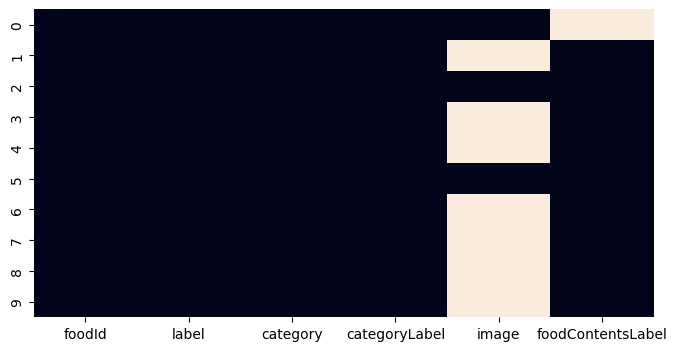

In [12]:
# ---------------------
# Missing values plot
# ---------------------
plt.figure(figsize=(8, 4))
sns.heatmap(test.isna(), cbar=False, cmap="rocket")
plt.show()

In [13]:
# Cellules vides par colonne
test.isna().sum()

foodId               0
label                0
category             0
categoryLabel        0
image                7
foodContentsLabel    1
dtype: int64

* Le fichier .csv est généré correctement à partir des 10 premiers produits à base de champagne.
* Sur plusieurs lignes manque au moins une donnée.

## <font size="+2" color="#903b3f"><b>Suppression des lignes avec données manquantes</b></font><br><a id="dropna"></a>

In [14]:
# Supprimer les lignes avec données manquantes
df_complete_target_cols = df_target_cols.dropna()
print(df_complete_target_cols.shape)
df_complete_target_cols

(3, 6)


,foodId,label,category,categoryLabel,image,foodContentsLabel
2,food_b3dyababjo54xobm6r8jzbghjgqe,"Champagne Vinaigrette, Champagne",Packaged foods,food,https://www.edamam.com/food-img/d88/d88b64d973...,INGREDIENTS: WATER; CANOLA OIL; CHAMPAGNE VINE...
5,food_bmu5dmkazwuvpaa5prh1daa8jxs0,"Champagne Dressing, Champagne",Packaged foods,food,https://www.edamam.com/food-img/ab2/ab2459fc2a...,SOYBEAN OIL; WHITE WINE (PRESERVED WITH SULFIT...
16,food_bu12urpbtuo9v6b4jpvk2a1fh4hh,"Champagne Simply Dressed Vinaigrette, Champagne",Packaged foods,food,https://www.edamam.com/food-img/736/736a3e27a6...,FILTERED WATER; CANOLA OIL; CHAMPAGNE AND WHIT...


### <font size="+2" color="#c0553d"><b>Stockage des données sans données manquantes, fichier .csv</b></font><br><a id="dropna_stockage"></a>

In [15]:
# Enregistrer au format ".csv" les dix premiers produits
df_complete_target_cols.to_csv(P6_cleaned
                               + 'dropna_champagne_dix_produits.csv',
                               sep='\t', encoding='utf-8', index=False)

dropna_champagne_dix_produitstest = pd.read_csv('champagne_dix_produits.csv')
test

In [16]:
# Vérification 
test2 = pd.read_csv(P6_cleaned+'dropna_champagne_dix_produits.csv', sep='\t')
print(test2.shape)
test2

(3, 6)


,foodId,label,category,categoryLabel,image,foodContentsLabel
0,food_b3dyababjo54xobm6r8jzbghjgqe,"Champagne Vinaigrette, Champagne",Packaged foods,food,https://www.edamam.com/food-img/d88/d88b64d973...,INGREDIENTS: WATER; CANOLA OIL; CHAMPAGNE VINE...
1,food_bmu5dmkazwuvpaa5prh1daa8jxs0,"Champagne Dressing, Champagne",Packaged foods,food,https://www.edamam.com/food-img/ab2/ab2459fc2a...,SOYBEAN OIL; WHITE WINE (PRESERVED WITH SULFIT...
2,food_bu12urpbtuo9v6b4jpvk2a1fh4hh,"Champagne Simply Dressed Vinaigrette, Champagne",Packaged foods,food,https://www.edamam.com/food-img/736/736a3e27a6...,FILTERED WATER; CANOLA OIL; CHAMPAGNE AND WHIT...


* Quand on ne considère que les produits renseignant tous les champs nécessaires, la base de données s'avère pas suffisamment complète pour répondre à la demande.